In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("T_games_dataset.csv")
df.head(1)

,id,client_id,order_day,category_id,category_name,good_id,good_name,good_price,good_cnt,gender_cd,age,education_level,city_nm,monthly_income_amt,steam_popularity_score
0,1500571355,5-25R6ZT3L9,2023-05-22,29688,Скидки,890257,The Night of the Rabbit,299.0,1.0,M,28,UGR,Москва,73552,0.0


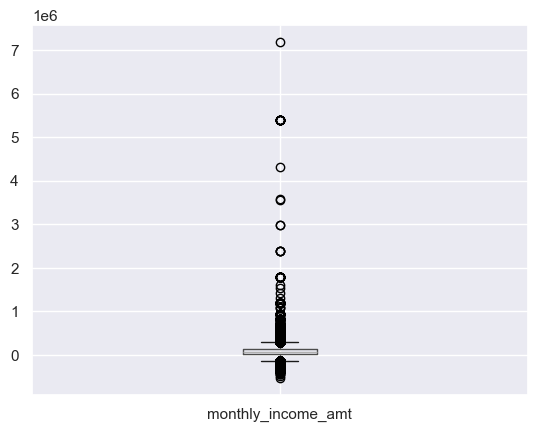

In [75]:
df.boxplot(column="monthly_income_amt")
plt.show()

# Отрицательные доходы, как это понимать?

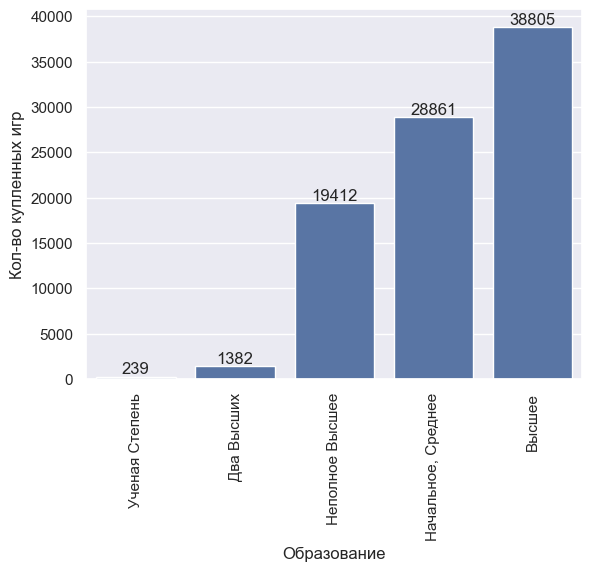

In [4]:
# Не правильно считаю кол-во, нужно считать сумму good_cnt
# Все нормально good_cnt везде 1.0
# Посчитать кол-во уникальных пользователей

sns.set_theme()

r = df.copy()
r.education_level = r.education_level.map({
    "SCH": "Начальное, Среднее",
    "GRD": "Высшее",
    "UGR": "Неполное Высшее",
    "PGR": "Два Высших",
    "ACD": "Ученая Степень"
})

games_count = r.education_level.value_counts()
ax = sns.barplot(
    games_count,
    order=games_count.reset_index().education_level[::-1]
)

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=90)
plt.xlabel("Образование")
plt.ylabel("Кол-во купленных игр")

plt.show()

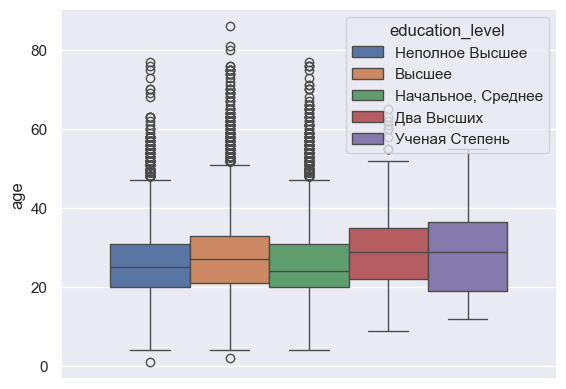

In [5]:
sns.boxplot(r, y="age", hue="education_level")

plt.show()

In [69]:
from datetime import datetime

df["weekday"] = df.order_day.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").weekday()).map({
    0: "Пн",
    1: "Вт",
    2: "Ср",
    3: "Чт",
    4: "Пт",
    5: "Сб",
    6: "Вс"
})

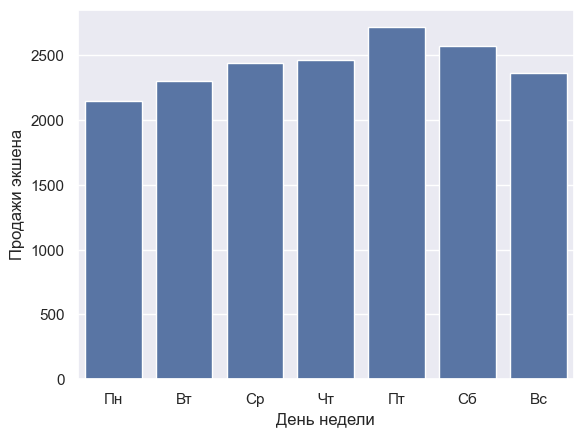

In [70]:
r = df.groupby("weekday").category_name.value_counts().reset_index()
r = r.groupby("weekday").first().reindex(labels=["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"]).reset_index()

sns.barplot(r, y="count", x="weekday")

plt.xlabel("День недели")
plt.ylabel("Продажи экшена")

plt.show()

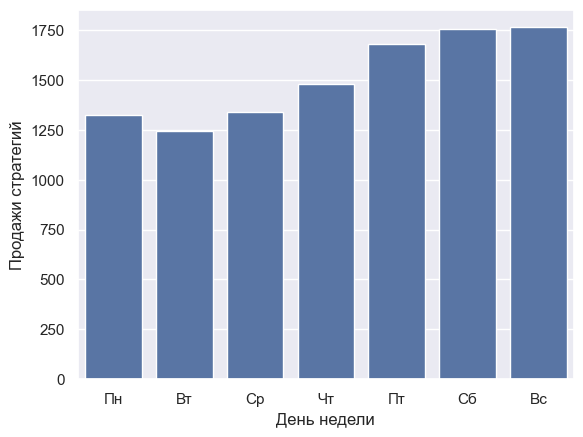

In [71]:
r = df.groupby("weekday").category_name.value_counts().reset_index()
r = r[r.category_name == "Стратегии"]
r.index = r.weekday
r = r.reindex(labels=["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"])

sns.barplot(r, x="weekday", y="count")

plt.xlabel("День недели")
plt.ylabel("Продажи стратегий")

plt.show()

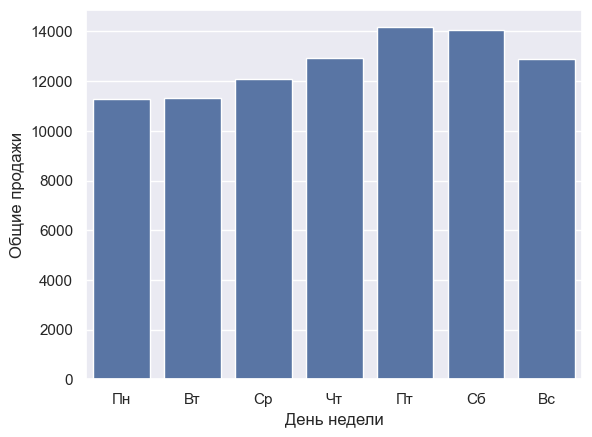

In [73]:
sns.barplot(df.weekday.value_counts(), order=["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"])

plt.xlabel("День недели")
plt.ylabel("Общие продажи")

plt.show()